# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
data = pd.read_csv(url)

data.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [27]:
# Dimensions of the dataset
data.shape


(4008, 11)

In [29]:
# Data types of each column
data.dtypes


Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [31]:
data.nunique()

Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64

In [35]:

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns].nunique()


Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
dtype: int64

In [57]:
# Remove '%' if present and convert to numeric
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].str.replace('%', '') 
data['Customer Lifetime Value'] = pd.to_numeric(data['Customer Lifetime Value'], errors='coerce')  # Convert to numeric


In [73]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute summary statistics for numerical columns
summary = data[numerical_columns].describe()
print(summary)

# Compute additional statistics (median, mode)
median_values = data[numerical_columns].median()
mode_values = data[numerical_columns].mode().iloc[0]  # Use .iloc[0] to get the first mode value
print("Median values:", median_values)
print("Mode values:", mode_values)


       Customer Lifetime Value        Income  Monthly Premium Auto  \
count             1.068000e+03   1071.000000           1071.000000   
mean              7.936903e+05  39295.701214            193.234360   
std               6.434784e+05  30469.427060           1601.190369   
min               2.004351e+05      0.000000             61.000000   
25%               4.034080e+05  14072.000000             68.000000   
50%               5.881742e+05  36234.000000             83.000000   
75%               8.962872e+05  64631.000000            109.500000   
max               5.816655e+06  99960.000000          35354.000000   

       Total Claim Amount  
count         1071.000000  
mean           404.986909  
std            293.027260  
min              0.382107  
25%            202.157702  
50%            354.729129  
75%            532.800000  
max           2893.239678  
Median values: Customer Lifetime Value    588174.235000
Income                      36234.000000
Monthly Premium Auto

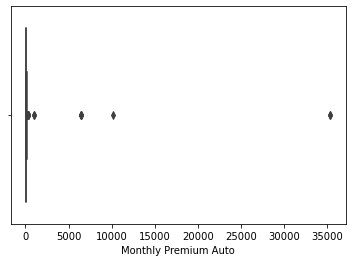

In [79]:
# investigate unusual std for monthly premium auto
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['Monthly Premium Auto'])
plt.show()



In [75]:
# Statistics for numerical columns
data.describe()



,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,1.068000e+03,1071.000000,1071.000000,1071.000000
mean,7.936903e+05,39295.701214,193.234360,404.986909
std,6.434784e+05,30469.427060,1601.190369,293.027260
min,2.004351e+05,0.000000,61.000000,0.382107
25%,4.034080e+05,14072.000000,68.000000,202.157702
50%,5.881742e+05,36234.000000,83.000000,354.729129
75%,8.962872e+05,64631.000000,109.500000,532.800000
max,5.816655e+06,99960.000000,35354.000000,2893.239678


Customer Lifetime Value: The mean of it is significantly higher than the median, indicating that there may be outliers pulling the mean upwards.

Total Claim Amount: This variable shows a wide range, indicating that claim amounts vary significantly between customers.

Monthly Premium Auto: Has an unusual std which is investigated in the graph. A standard deviation of 1600 for monthly auto premiums is very unusual and likely indicates the presence of extreme outliers or data entry errors. 

Distribution: Numerical columns such as Customer Lifetime Value may be skewed due to outliers. This is evident by comparing mean and median values.

In [81]:
# Statistics for categorical columns
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())

Value counts for Customer:
Customer
RB50392    1
HJ15383    1
AO74776    1
HQ82233    1
OL72737    1
          ..
RO26085    1
ES57969    1
JK55587    1
RN97635    1
MY31220    1
Name: count, Length: 1071, dtype: int64
Value counts for ST:
ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64
Value counts for GENDER:
GENDER
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64
Value counts for Education:
Education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64
Value counts for Customer Lifetime Value:
Customer Lifetime Value
445811.34     4
251459.20     4
272535.64     3
578018.22     3
684615.03     3
             ..
245357.08     1
507566.27     1
321497.94     1
1227534.31    1
8


Gender: There is likely a balanced gender distribution in the dataset.
Policy Type: Customers are most commonly subscribed to Personal Auto policies, with fewer choosing Corporate Auto or Special Auto.
Vehicle Class: Most customers own standard car types like Four-Door Car, with fewer owning Luxury vehicles.

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [43]:
# The frequencies of locations
location_counts = data['ST'].value_counts(ascending=True)

# 5 less common locations
less_common_locations = location_counts.head(5)
print(less_common_locations)


ST
AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: count, dtype: int64


### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [45]:
# Counts of each policy type
policy_counts = data['Policy Type'].value_counts()

# Highest number of policies sold
most_policy_type = policy_counts.idxmax()
print(f"the most policy type: {most_policy_type}")
print(policy_counts)


the most policy type: Personal Auto
Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [49]:

personal_auto = data.loc[data['Policy Type'] == 'Personal Auto']
corporate_auto = data.loc[data['Policy Type'] == 'Corporate Auto']

# The average income for each policy type
average_income_personal = personal_auto['Income'].mean()
average_income_corporate = corporate_auto['Income'].mean()

print(f"Average income for Personal Auto policyholders: {average_income_personal:}")
print(f"Average income for Corporate Auto policyholders: {average_income_corporate:}")


Average income for Personal Auto policyholders: 38180.69871794872
Average income for Corporate Auto policyholders: 41390.31196581197
